# Business Understanding

Dalam industri perbankan, pemasaran langsung (direct marketing) merupakan strategi penting untuk menarik nasabah baru dan meningkatkan penjualan produk keuangan seperti deposito berjangka. Namun, semakin banyaknya kampanye pemasaran selama bertahun-tahun telah mengurangi efektivitasnya. Persaingan ketat dan tekanan ekonomi membuat bank harus mengadopsi pendekatan yang lebih efisien dalam pemilihan target pelanggan.

Kampanye pemasaran massal yang tidak ditargetkan sering kali memiliki tingkat respons yang sangat rendah, bahkan kurang dari 1%​. Sebagai alternatif, pemasaran langsung yang lebih terarah dapat meningkatkan efisiensi dengan menargetkan pelanggan yang lebih mungkin tertarik dengan produk yang ditawarkan. Namun, pendekatan ini juga memiliki tantangan, seperti kemungkinan munculnya reaksi negatif dari pelanggan akibat gangguan yang dirasakan​. Oleh karena itu, pihak bank perlu mengetahui faktor-faktor yang mempengaruhi keberhasilan suatu kampanye pemasaran. Dengan menganalisis data historis kampanye pemasaran sebelumnya, bank dapat membangun model prediktif yang membantu mengidentifikasi pelanggan potensial dengan tingkat keberhasilan tinggi. Dengan begitu, jumlah panggilan yang tidak efektif dapat dikurangi tanpa menurunkan jumlah pelanggan yang berhasil dikonversi.

### Tujuan Bisnis

Tujuan utama dari analisis data ini adalah meningkatkan efektivitas kampanye pemasaran bank dengan:

- Meningkatkan tingkat konversi pelanggan yang berlangganan deposito berjangka

- Mengoptimalkan pemilihan target pelanggan, sehingga bank hanya menghubungi pelanggan dengan peluang tinggi untuk menerima tawaran.

- Mengurangi biaya operasional, termasuk jumlah panggilan telepon yang tidak membuahkan hasil.

- Memanfaatkan teknologi Business Intelligence (BI) dan Data Mining (DM) untuk memahami pola keberhasilan kampanye pemasaran dan mengembangkan strategi berbasis data​

# Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import pandas as pd
import time

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder


In [2]:
df = pd.read_csv("C:/Users/Lenovo/Downloads/bank-full.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,36.0,technician,single,tertiary,no,0.0,no,no,unknown,17.0,jun,153.0,4.0,-1.0,0.0,unknown,no
1,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
2,56.0,entrepreneur,married,secondary,no,196.0,no,no,cellular,19.0,nov,312.0,3.0,-1.0,0.0,unknown,no
3,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
4,46.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5.0,jun,83.0,2.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75786,60.0,technician,married,tertiary,no,503.0,no,no,cellular,16.0,NaN,142.0,3.0,328.0,NaN,failure,yes
75787,37.0,blue-collar,single,secondary,no,2081.0,yes,no,NaN,19.0,feb,295.0,NaN,451.0,1.0,NaN,yes
75788,25.0,blue-collar,single,secondary,no,0.0,no,no,cellular,NaN,apr,163.0,1.0,-1.0,0.0,NaN,yes
75789,29.0,admin.,married,secondary,no,1761.0,NaN,yes,NaN,14.0,NaN,175.0,1.0,-1.0,0.0,unknown,no


In [3]:
df.rename(columns={'y': 'subscription status'}, inplace=True)


# Statistika Deskriptif

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75791 entries, 0 to 75790
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  75113 non-null  float64
 1   job                  75717 non-null  object 
 2   marital              75721 non-null  object 
 3   education            75597 non-null  object 
 4   default              75105 non-null  object 
 5   balance              74817 non-null  float64
 6   housing              74585 non-null  object 
 7   loan                 75723 non-null  object 
 8   contact              73271 non-null  object 
 9   day                  74451 non-null  float64
 10  month                73800 non-null  object 
 11  duration             75028 non-null  float64
 12  campaign             75135 non-null  float64
 13  pdays                75648 non-null  float64
 14  previous             74553 non-null  float64
 15  poutcome             75020 non-null 

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,75113.000000,74817.000000,74451.000000,75028.000000,75135.000000,75648.000000,74553.000000
mean,40.955866,1500.089164,15.414756,353.347484,2.435869,49.327913,0.711467
std,10.866963,3116.426860,7.909182,336.530792,2.699985,106.361740,2.166834
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,113.000000,9.000000,134.000000,1.000000,-1.000000,0.000000
50%,39.000000,533.000000,15.000000,239.000000,2.000000,-1.000000,0.000000
75%,48.000000,1685.000000,21.000000,461.000000,3.000000,4.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription status
count,75113.000000,75717,75721,75597,75105,74817.000000,74585,75723,73271,74451.000000,73800,75028.000000,75135.000000,75648.000000,74553.000000,75020,75791
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,17085,47964,41821,74184,NaN,41947,67446,53876,NaN,18604,NaN,NaN,NaN,NaN,57058,43921
mean,40.955866,NaN,NaN,NaN,NaN,1500.089164,NaN,NaN,NaN,15.414756,NaN,353.347484,2.435869,49.327913,0.711467,NaN,NaN
std,10.866963,NaN,NaN,NaN,NaN,3116.426860,NaN,NaN,NaN,7.909182,NaN,336.530792,2.699985,106.361740,2.166834,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,113.000000,NaN,NaN,NaN,9.000000,NaN,134.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,533.000000,NaN,NaN,NaN,15.000000,NaN,239.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1685.000000,NaN,NaN,NaN,21.000000,NaN,461.000000,3.000000,4.000000,0.000000,NaN,NaN


Dari total data, sebanyak 6.69% memiliki saldo negatif, menunjukkan lebih banyak menarik uang daripada menabung, sementara 6.50% memiliki saldo nol. Mayoritas, 85.53%, memiliki saldo positif.

In [7]:

neg_count = len(df[df["balance"] < 0])
zero_count = len(df[df["balance"] == 0])
pos_count = len(df[df["balance"] > 0])

total_count = len(df)

neg_percent = (neg_count / total_count) * 100
zero_percent = (zero_count / total_count) * 100
pos_percent = (pos_count / total_count) * 100

result = pd.DataFrame({
    "Kategori": ["balance < 0", "balance = 0", "balance > 0"],
    "Jumlah": [neg_count, zero_count, pos_count],
    "Persentase": [neg_percent, zero_percent, pos_percent]
})
result

,Kategori,Jumlah,Persentase
0,balance < 0,5068,6.686810
1,balance = 0,4923,6.495494
2,balance > 0,64826,85.532583


In [8]:
numerical_features = df.select_dtypes(include=['number'])  # Pilih kolom numerik
descriptive_stats = pd.DataFrame({
    'Mean': numerical_features.mean(),
    'Median': numerical_features.median(),
    'Modus': numerical_features.mode().iloc[0],
    'Variansi': numerical_features.var(),
    'Deviasi Standar': numerical_features.std()
})
print(descriptive_stats)


                 Mean  Median  Modus      Variansi  Deviasi Standar
age         40.955866    39.0   32.0  1.180909e+02        10.866963
balance   1500.089164   533.0    0.0  9.712116e+06      3116.426860
day         15.414756    15.0   20.0  6.255516e+01         7.909182
duration   353.347484   239.0  124.0  1.132530e+05       336.530792
campaign     2.435869     2.0    1.0  7.289918e+00         2.699985
pdays       49.327913    -1.0   -1.0  1.131282e+04       106.361740
previous     0.711467     0.0    0.0  4.695171e+00         2.166834


In [9]:
df.isna().sum()

age                     678
job                      74
marital                  70
education               194
default                 686
balance                 974
housing                1206
loan                     68
contact                2520
day                    1340
month                  1991
duration                763
campaign                656
pdays                   143
previous               1238
poutcome                771
subscription status       0
dtype: int64

In [10]:


def null_ratio(data, features):
    nullratio_feature=pd.DataFrame()
    null=np.zeros(len(features))
    null_ratio=np.zeros(len(features))

    for i in range (len(features)):
        null[i]=data[features[i]].isna().sum()
        null_ratio[i]=((data[features[i]].isna().sum())/len(data))*100

    nullratio_feature=pd.DataFrame({'features':features,'null count':null, 'null ratio (%)':null_ratio})
    nullratio_feature['null ratio (%)'] = nullratio_feature['null ratio (%)'].map(lambda x: f"{x:.4f}")

    return nullratio_feature

null_ratio(df, df.columns)

,features,null count,null ratio (%)
0,age,678.0,0.8946
1,job,74.0,0.0976
2,marital,70.0,0.0924
3,education,194.0,0.2560
4,default,686.0,0.9051
5,balance,974.0,1.2851
6,housing,1206.0,1.5912
7,loan,68.0,0.0897
8,contact,2520.0,3.3249
9,day,1340.0,1.7680


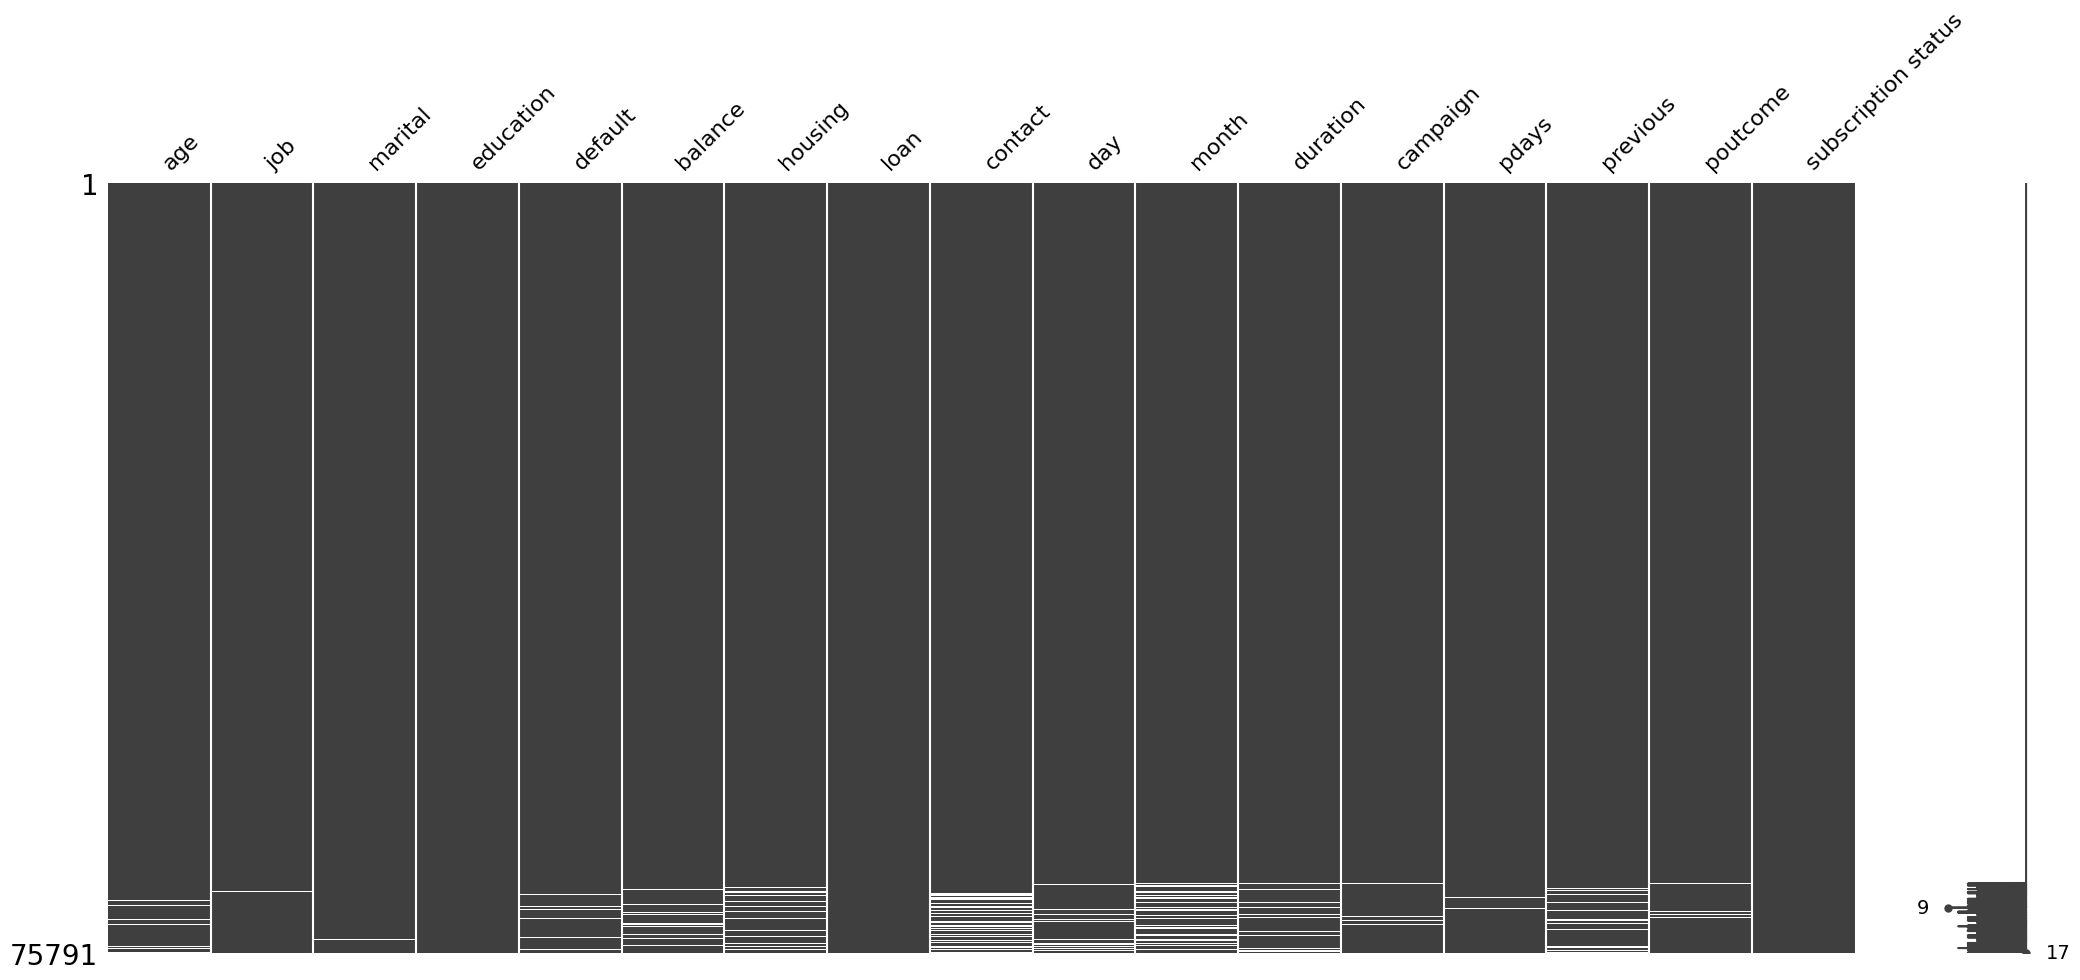

In [11]:
msno.matrix(df)
plt.show()

In [12]:
df[df.isna().any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription status
68901,34.0,admin.,married,secondary,no,NaN,no,no,cellular,19.0,aug,256.0,2.0,-1.0,NaN,unknown,no
68902,34.0,admin.,married,tertiary,no,60.0,NaN,no,cellular,8.0,may,394.0,1.0,190.0,3.0,other,yes
68903,NaN,management,married,secondary,no,4794.0,no,no,NaN,12.0,NaN,249.0,1.0,-1.0,0.0,unknown,yes
68904,22.0,student,single,unknown,no,1232.0,no,no,cellular,30.0,jul,283.0,1.0,430.0,NaN,NaN,yes
68905,34.0,services,married,tertiary,no,NaN,yes,no,cellular,12.0,may,619.0,2.0,-1.0,0.0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75786,60.0,technician,married,tertiary,no,503.0,no,no,cellular,16.0,NaN,142.0,3.0,328.0,NaN,failure,yes
75787,37.0,blue-collar,single,secondary,no,2081.0,yes,no,NaN,19.0,feb,295.0,NaN,451.0,1.0,NaN,yes
75788,25.0,blue-collar,single,secondary,no,0.0,no,no,cellular,NaN,apr,163.0,1.0,-1.0,0.0,NaN,yes
75789,29.0,admin.,married,secondary,no,1761.0,NaN,yes,NaN,14.0,NaN,175.0,1.0,-1.0,0.0,unknown,no


Dari total 75.791 data (klien), setiap fitur memiliki missing value dalam rentang 0-3%.

# Eksplorasi Visualisasi Data

### Histogram dan Density Plot Variabel Numerik

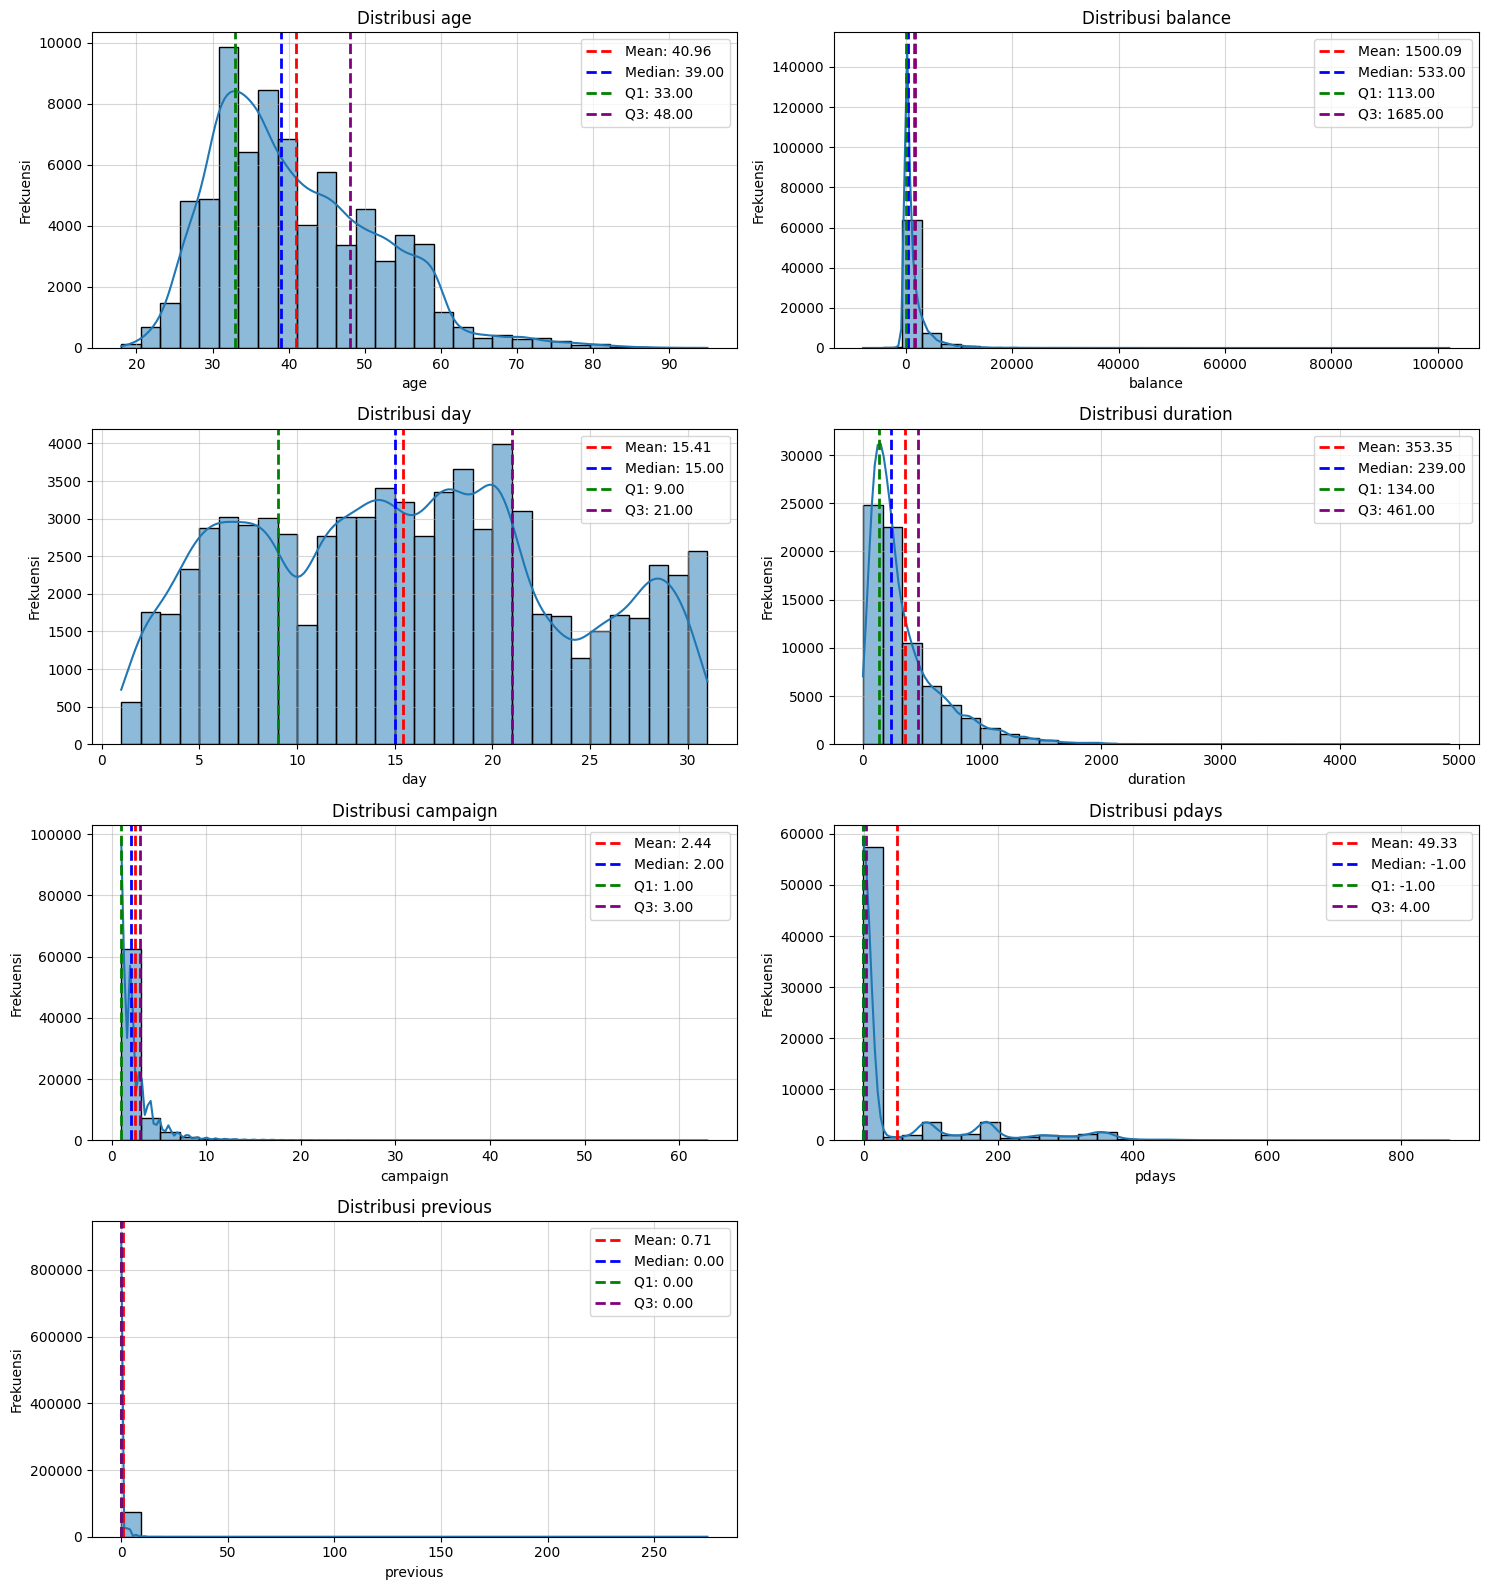

In [13]:
numerical_features = df.select_dtypes(include=['number'])

n_cols = 2
n_rows = int(np.ceil(len(numerical_features.columns) / n_cols))

colors = sns.color_palette("husl", len(numerical_features.columns))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_features.columns):
    ax = axes[i]

    sns.histplot(numerical_features[col], bins=30, ax=ax, kde=True)

    q1 = numerical_features[col].quantile(0.25)
    median = numerical_features[col].median()
    q3 = numerical_features[col].quantile(0.75)
    mean = numerical_features[col].mean()
    
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    ax.axvline(q1, color='green', linestyle='dashed', linewidth=2, label=f'Q1: {q1:.2f}')
    ax.axvline(q3, color='purple', linestyle='dashed', linewidth=2, label=f'Q3: {q3:.2f}')
    
    ax.set_title(f'Distribusi {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frekuensi')
    ax.legend()
    ax.grid(True, alpha = 0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
age_means = {
    "balance > 1500": df[df["balance"] > 1500]["age"].mean(),
    "balance > 10000": df[df["balance"] > 10000]["age"].mean(),
    "balance > 20000": df[df["balance"] > 20000]["age"].mean(),
    "balance > 30000": df[df["balance"] > 30000]["age"].mean(),
    "balance > 40000": df[df["balance"] > 40000]["age"].mean(),
}

age_means_df = pd.DataFrame.from_dict(age_means, orient="index", columns=["Average Age"])
age_means_df


,Average Age
balance > 1500,43.452068
balance > 10000,44.199868
balance > 20000,43.892744
balance > 30000,50.757895
balance > 40000,56.375000


### Distrbusi Variabel Kategorik  Berdasarkan Target

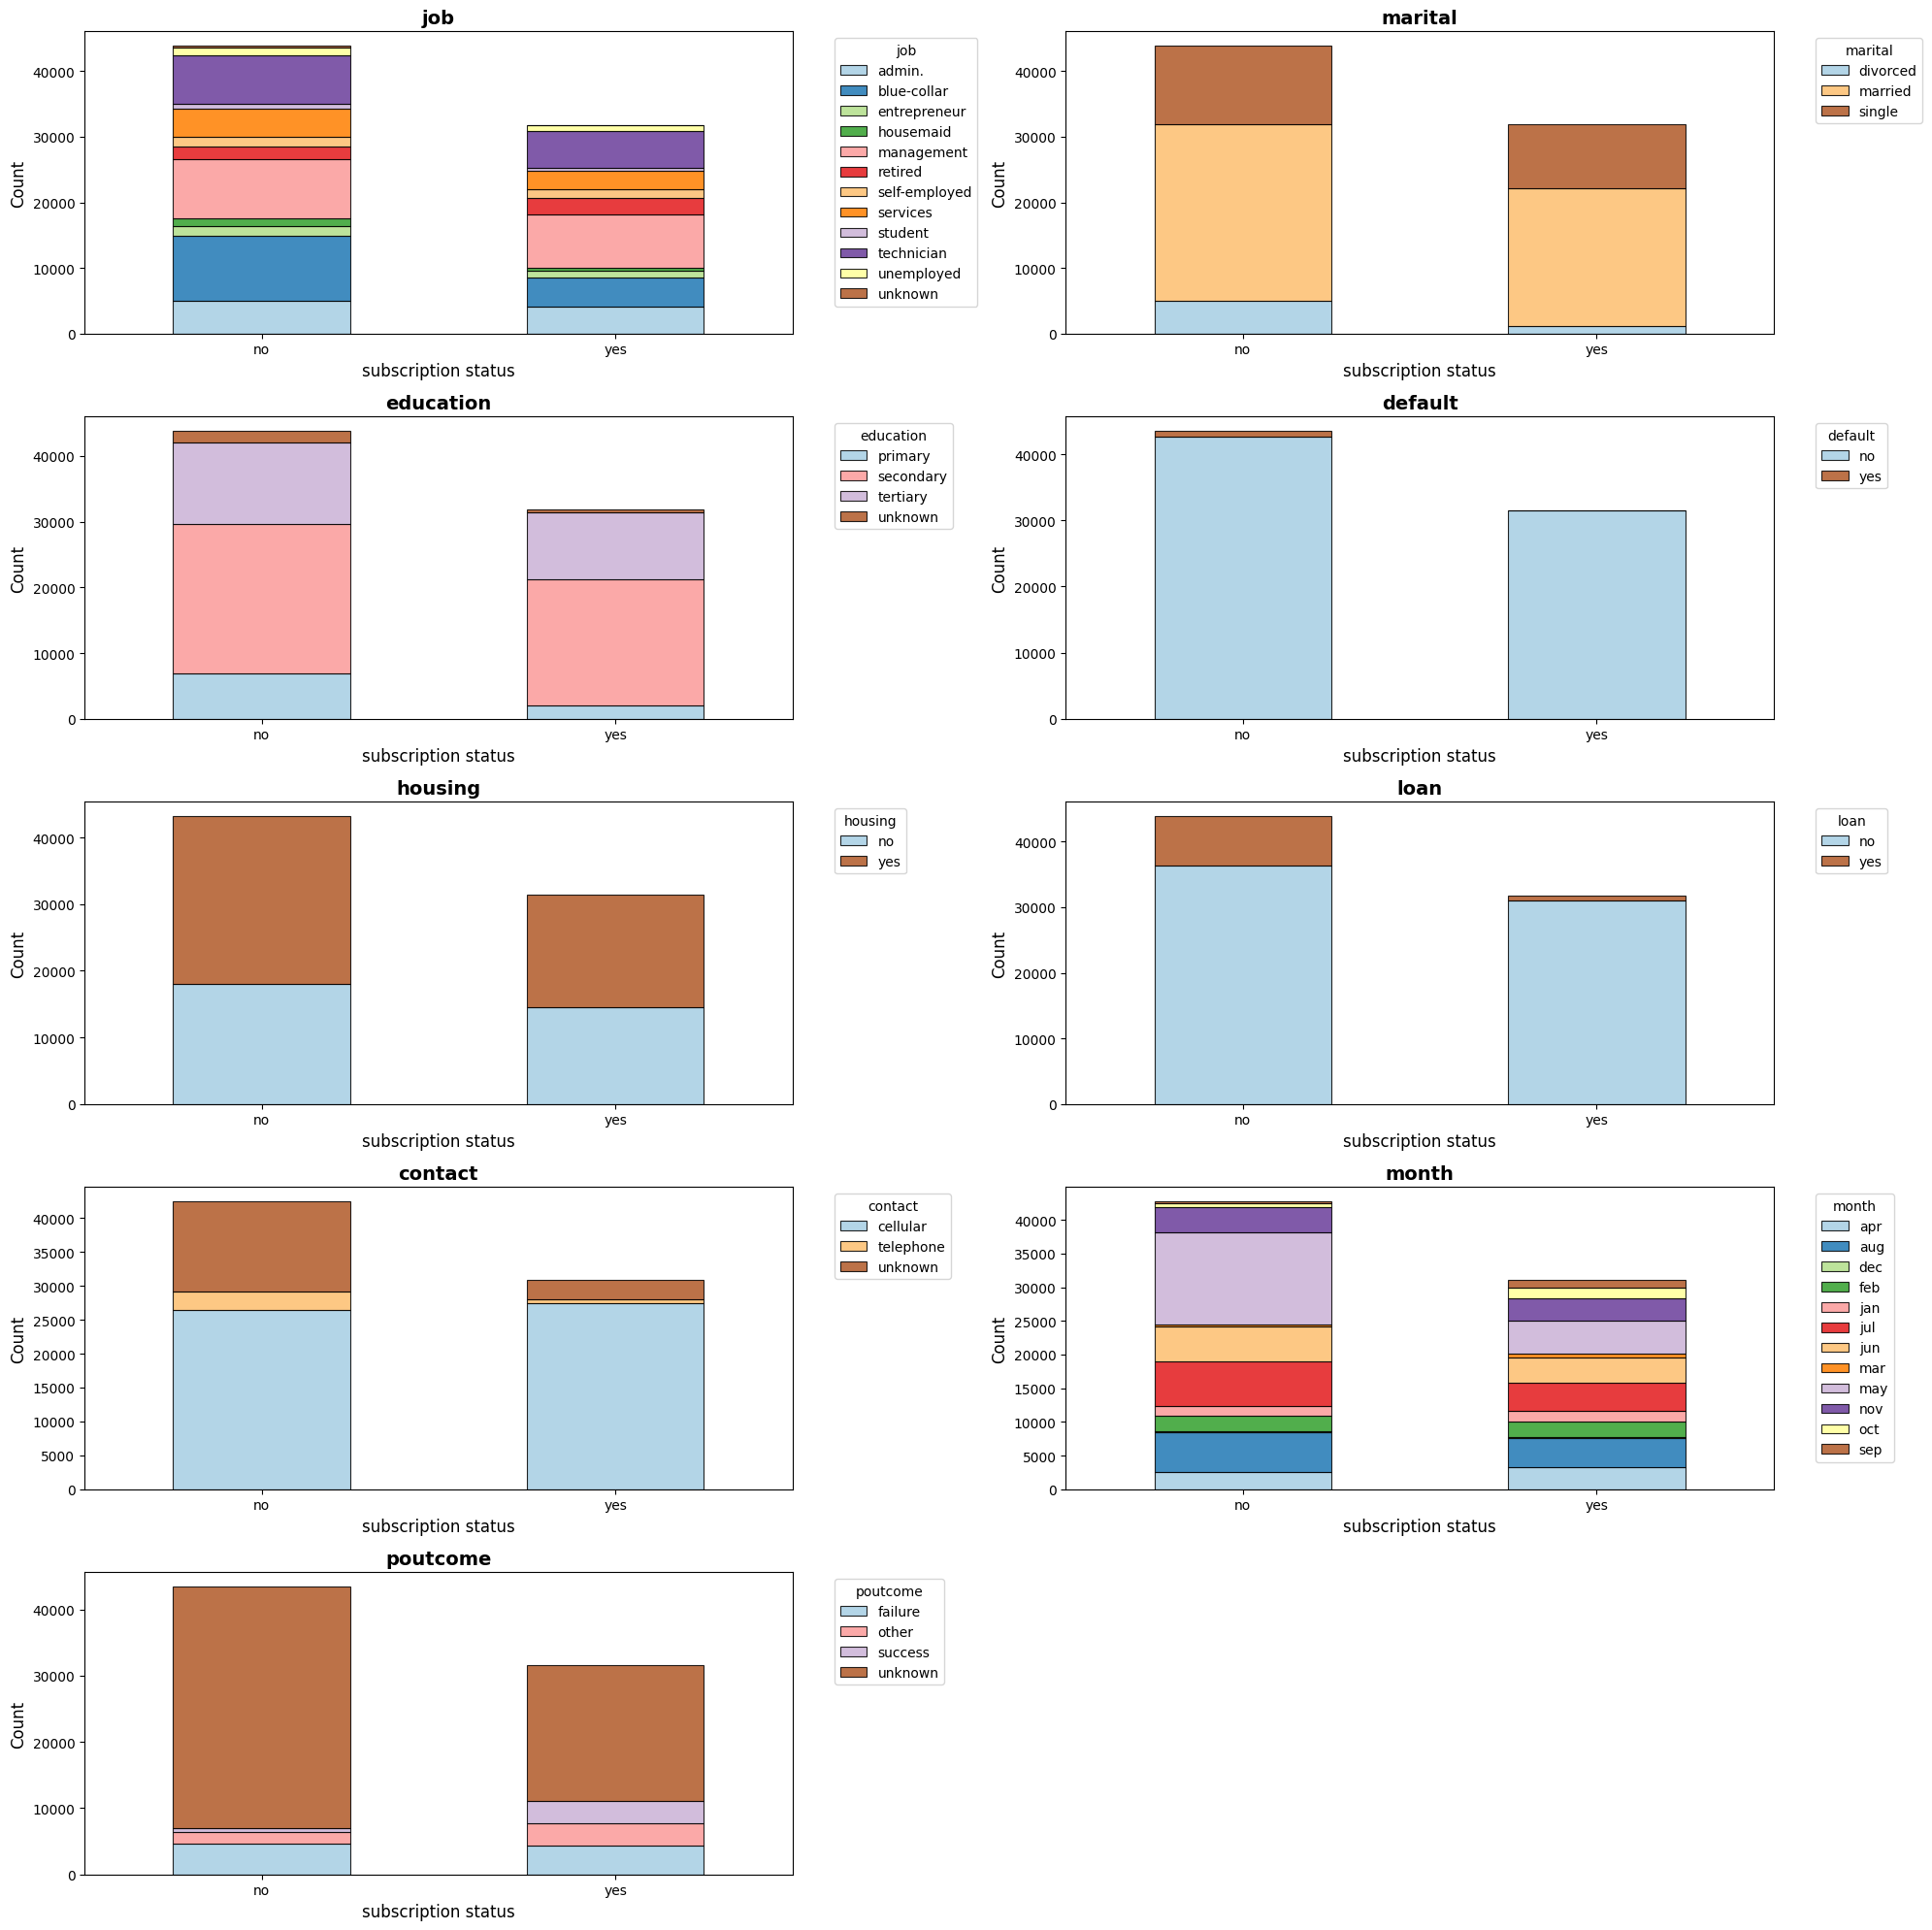

In [15]:
import numpy as np
import matplotlib.pyplot as plt

categorical_vars = df.select_dtypes(include=['object']).columns
categorical_vars = categorical_vars[categorical_vars != 'subscription status'].tolist()  

n_cols = 2
n_rows = int(np.ceil(len(categorical_vars) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    if var in df.columns:
        counts = df.dropna(subset=[var]).groupby(['subscription status', var]).size().unstack(fill_value=0)
        counts.plot(kind='bar', stacked=True, ax=axes[i], colormap='Paired', alpha=0.85, edgecolor='black', linewidth=0.8)
        
        axes[i].set_title(var, fontsize=14, fontweight='bold')
        axes[i].set_ylabel('Count', fontsize=12)
        axes[i].set_xlabel('subscription status', fontsize=12)
        axes[i].legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')

        # Mengatur rotasi label x agar horizontal
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### Distrbusi Variabel Numerik  Berdasarkan Target

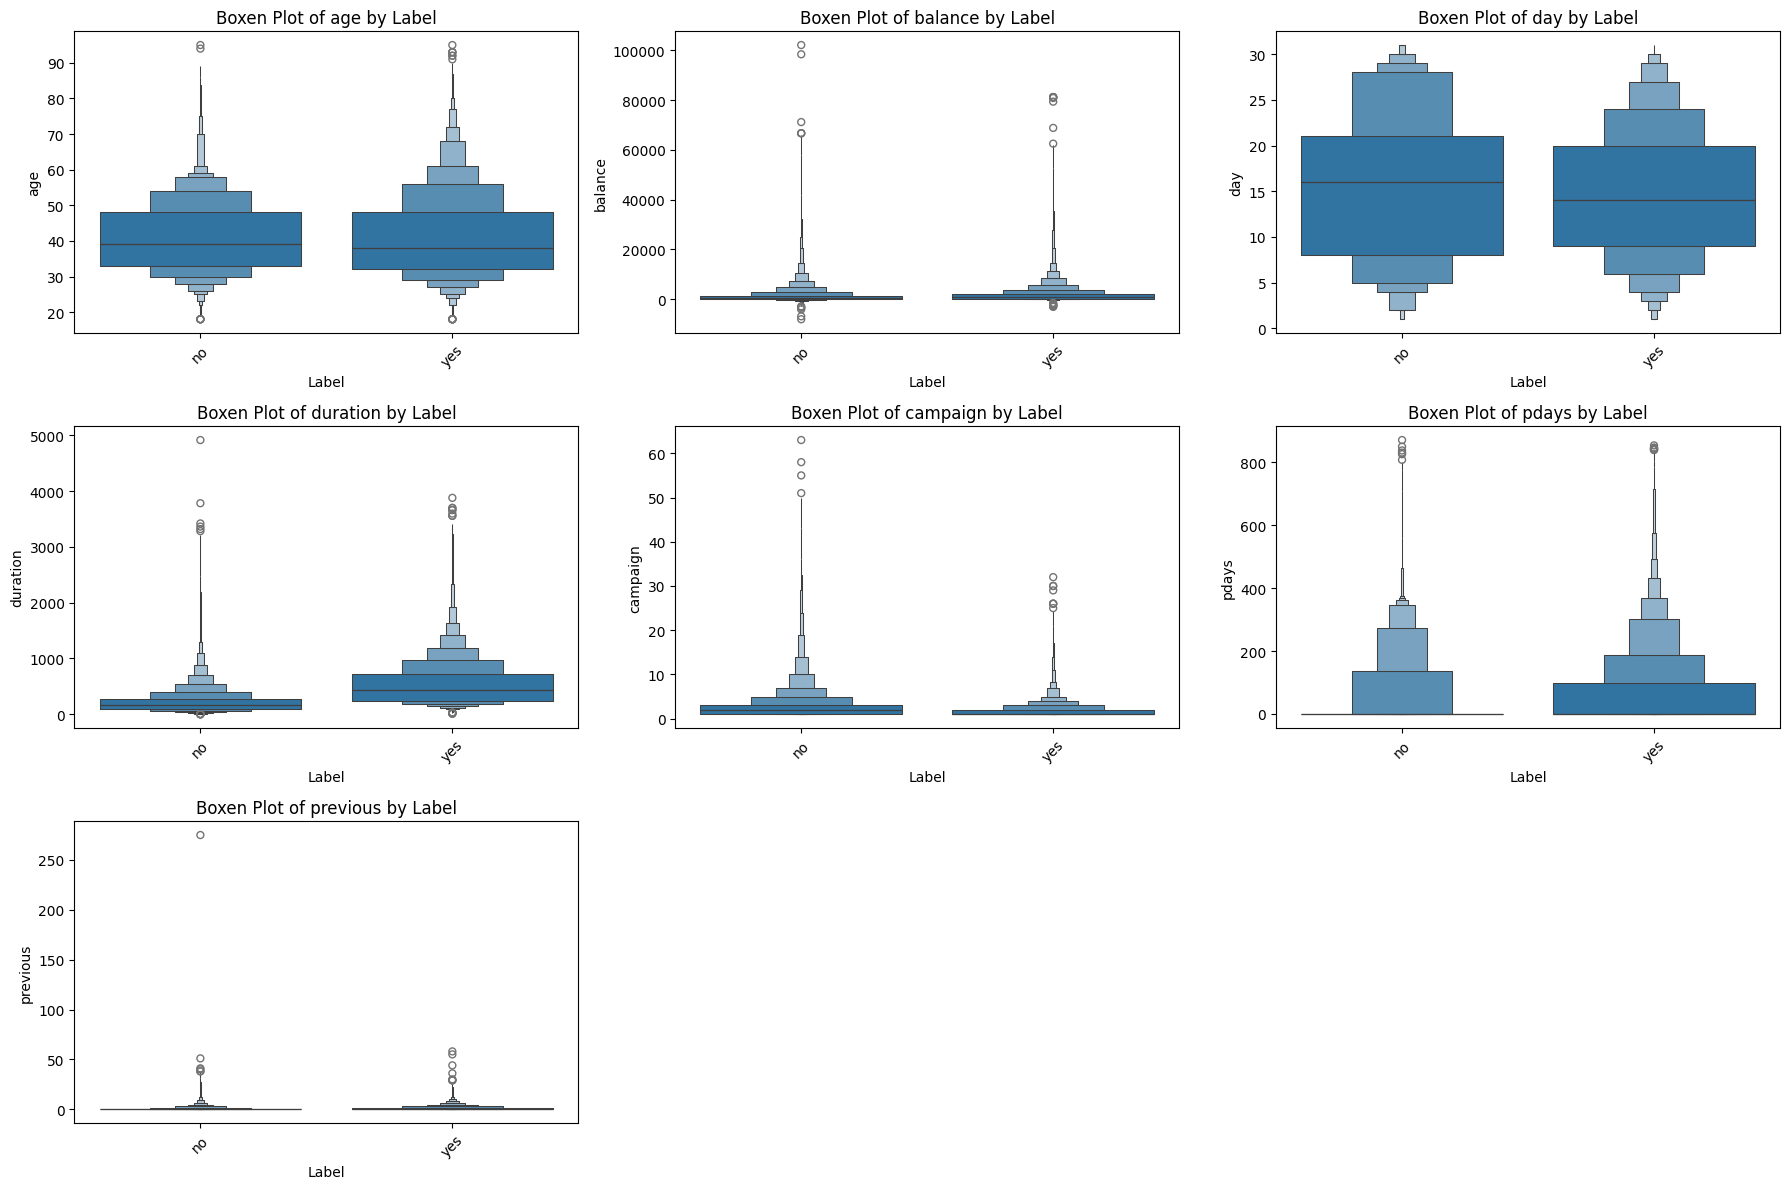

In [16]:
numeric_vars = df.select_dtypes(include=['number'])

n_vars = len(numeric_vars.columns)  
n_cols = 3  
n_rows = int(np.ceil(n_vars / n_cols))  

plt.figure(figsize=(18, 4 * n_rows))  

for i, var in enumerate(numeric_vars.columns, 1):  
    plt.subplot(n_rows, n_cols, i) 
    sns.boxenplot(x='subscription status', y=var, data=df) 
    plt.title(f'Boxen Plot of {var} by Label')
    plt.xlabel('Label')
    plt.ylabel(var)
    
    plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscription status'],
      dtype='object')

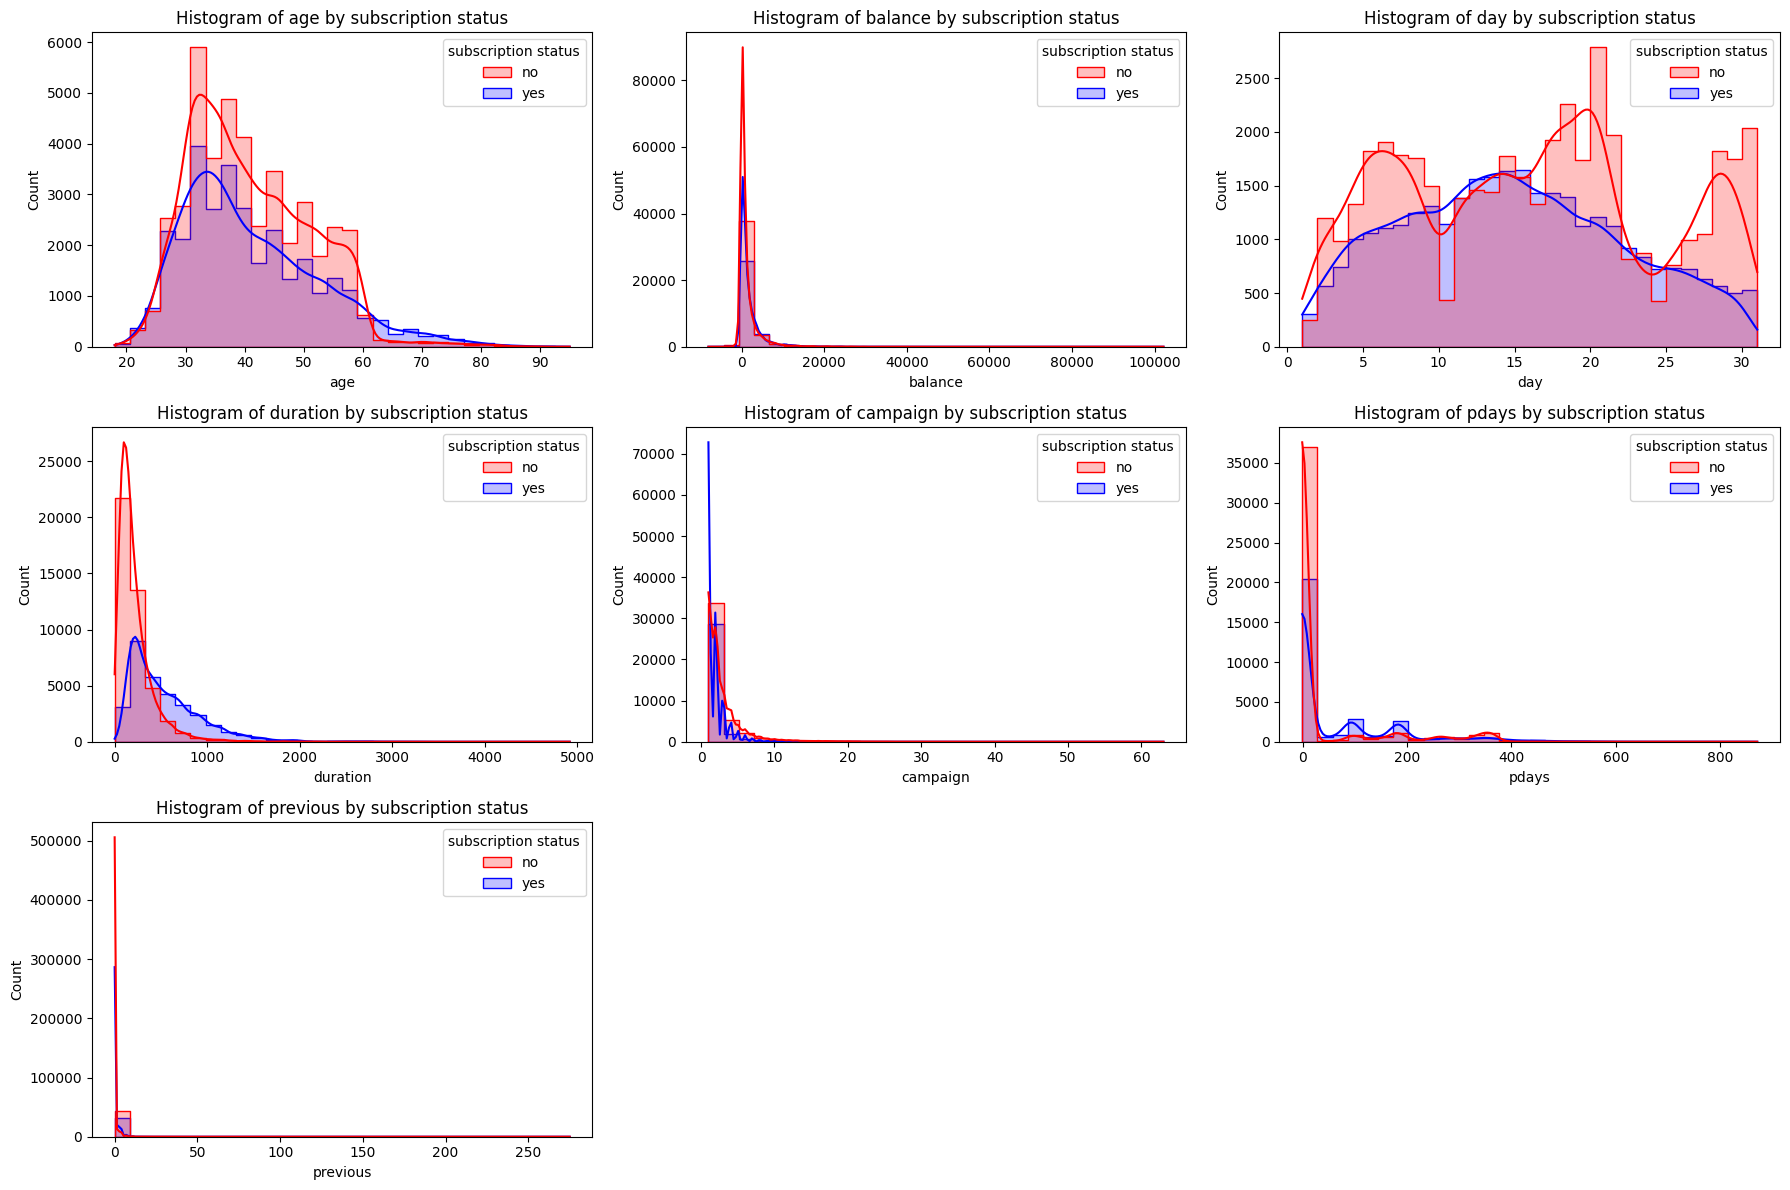

In [18]:
numeric_vars = df.select_dtypes(include=['number'])

n_vars = len(numeric_vars.columns)  
n_cols = 3  
n_rows = int(np.ceil(n_vars / n_cols))  

plt.figure(figsize=(18, 4 * n_rows)) 

# Warna manual untuk setiap kategori
custom_palette = {'no': 'red', 'yes': 'blue'}

for i, var in enumerate(numeric_vars.columns, 1):  
    plt.subplot(n_rows, n_cols, i)  
    sns.histplot(df, x=var, hue='subscription status', element='step', kde=True, bins=30, palette=custom_palette)  
    
    plt.title(f'Histogram of {var} by subscription status')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Cleaning

### Missing Value

In [19]:
df.loc[df['job'].isin(['admin.', 'services', 'technician']), 'education'] = df['education'].fillna('secondary')

In [20]:
df.loc[df['balance'] > 5000, 'default'] = df['default'].fillna('no')

In [21]:
df.loc[df['pdays'] == -1, 'previous'] = df['previous'].fillna(0)

### Outlier

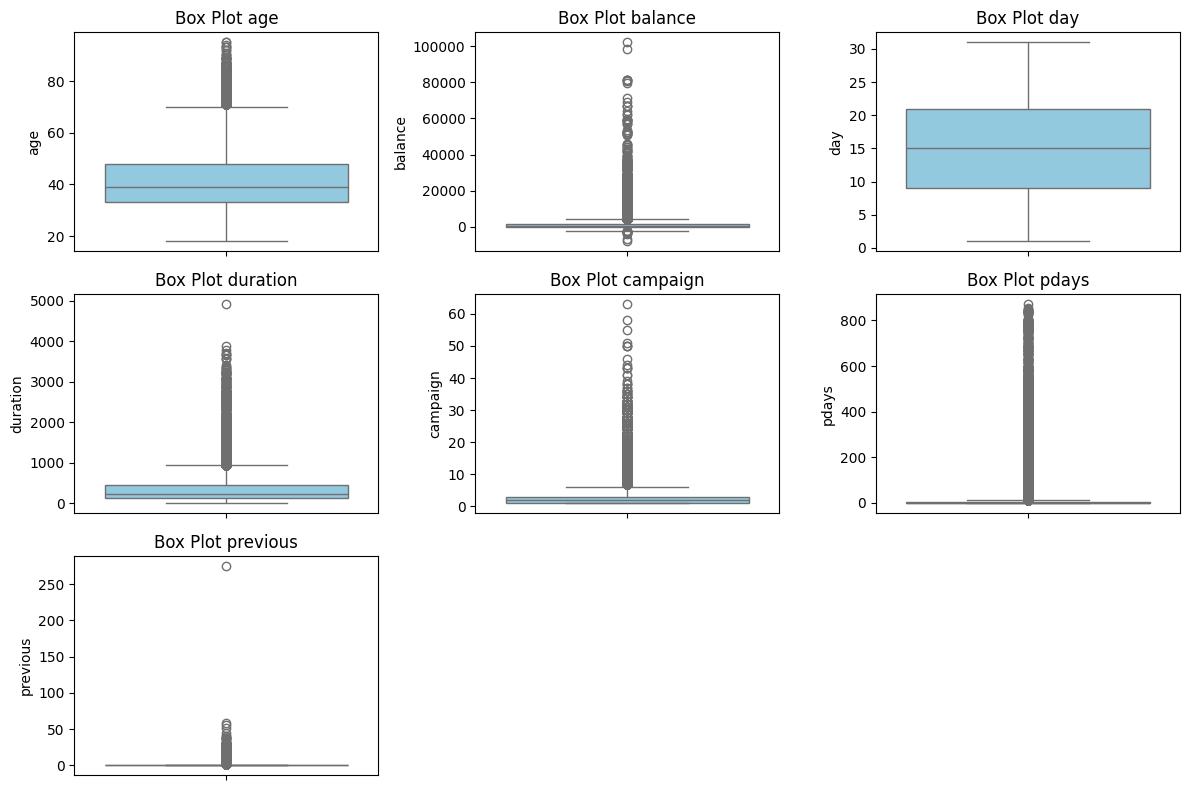

In [22]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_features.columns):
    plt.subplot(len(numerical_features.columns) // 3 + 1, 3, i + 1)  # Buat grid 3 kolom per baris
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f'Box Plot {col}')

plt.tight_layout()
plt.show()


In [23]:
# Menentukan IQR
Q1 = df["balance"].quantile(0.25)
Q3 = df["balance"].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outlier dengan batas atas
df["balance_capped"] = np.where(df["balance"] > upper_bound, upper_bound, 
                                np.where(df["balance"] < lower_bound, lower_bound, df["balance"]))
#df.drop(['balance'], axis=1, inplace=True)

In [24]:
# Menentukan IQR
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outlier dengan batas atas
df["age_capped"] = np.where(df["age"] > upper_bound, upper_bound, 
                                np.where(df["age"] < lower_bound, lower_bound, df["age"]))
#df.drop(['balance'], axis=1, inplace=True)

In [25]:
# Menentukan IQR
Q1 = df["campaign"].quantile(0.25)
Q3 = df["campaign"].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outlier dengan batas atas
df["campaign_capped"] = np.where(df["campaign"] > upper_bound, upper_bound, 
                                np.where(df["campaign"] < lower_bound, lower_bound, df["campaign"]))
#df.drop(['campaign'], axis=1, inplace=True)

In [27]:
max_previous = df['previous'].max()
second_max_previous = df['previous'][df['previous'] != max_previous].max()

# Replace the maximum value with the second maximum value
df['previous'] = df['previous'].replace(max_previous, second_max_previous)

In [28]:
from scipy.stats.mstats import winsorize

# Capping outlier dengan batas atas dan bawah
df["previous_winsorized"] =  winsorize(df['previous'], limits=[0.05, 0.05])  # Capping di persentil 5% dan 95%
#df.drop(['previous'], axis=1, inplace = True)

# Feature Engineering

In [29]:
df['housing_loan'] = df.apply(lambda x: 'yes' if x['housing'] == 'yes' and x['loan'] == 'yes' else 'no', axis=1)

df['Week'] = pd.cut(df['day'], bins=[0, 8, 15, 22, 31], labels=['1st', '2nd', '3rd','4th'], right=False)

df['previous_contacted'] = df['pdays'].apply(lambda x: 'no' if x == -1 else 'yes')

# Ensure 'age' column exists before applying operations
if 'age' in df.columns:
    df['age_in_previous_campaign'] = df['age'].where(df['pdays'] == -1, df['age'] - df['pdays'] / 365)
else:
    df['age_in_previous_campaign'] = None

def categorize_season(month):
    if month in ['mar', 'apr', 'may']:
        return 'Spring'
    elif month in ['jun', 'jul', 'aug']:
        return 'Summer'
    elif month in ['sep', 'oct', 'nov']:
        return 'Autumn'
    else:  # 'dec', 'jan', 'feb'
        return 'Winter'

df['season'] = df['month'].apply(categorize_season)

# Pra Pemrosesan

In [32]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscription status', 'balance_capped',
       'age_capped', 'campaign_capped', 'previous_winsorized', 'housing_loan',
       'Week', 'previous_contacted', 'age_in_previous_campaign', 'season',
       'age_group'],
      dtype='object')

In [33]:
df = df[['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'pdays',
        'poutcome', 'subscription status', 'balance_capped', 'campaign_capped','age_capped',
       'previous_winsorized', 'housing_loan','Week','previous_contacted',
        'season', 'duration']]

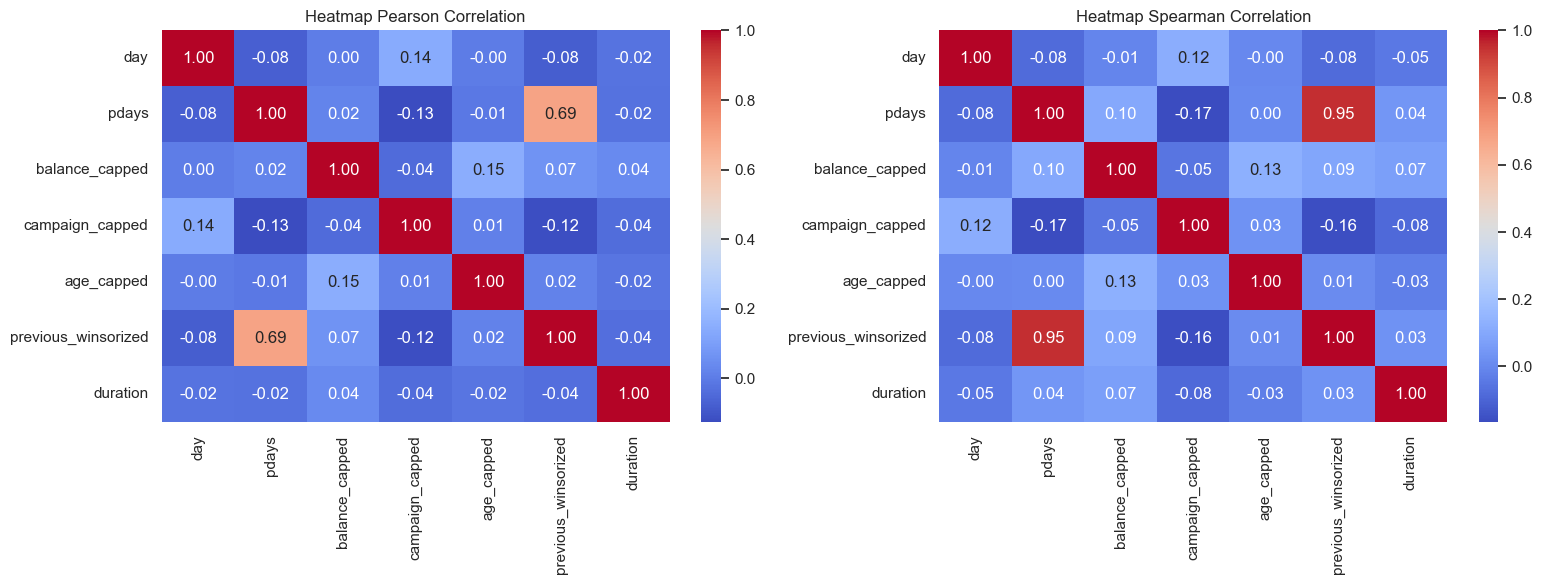

In [34]:
num_feat = df.select_dtypes(include=['number']).columns.tolist()

corr_pearson = df[num_feat].corr(method='pearson')
corr_spearman = df[num_feat].corr(method='spearman')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Heatmap Pearson Correlation')

sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Heatmap Spearman Correlation')

plt.tight_layout()
plt.show()


In [35]:
class_job = {
    'technician': 0, 'management': 1, 'entrepreneur': 2, 'blue-collar': 3,
    'unknown': 4, 'admin.': 5, 'retired': 6, 'housemaid': 7, 'services': 8,
    'student': 9, 'unemployed': 10, 'self-employed': 11
}

class_marital = {
    'divorced': 0,'single': 1, 'married': 2
}

class_education = {
    'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3
}

class_bin = {
    'no': 0, 'yes': 1
}

class_contact = {
    'unknown': 0, 'cellular': 1, 'telephone': 2
}

class_month = {
    'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5,
    'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11
}

class_poutcome = {
    'failure': 0, 'unknown': 1, 'other': 2, 'success': 3
}

class_target = {
    'no': 0, 'yes': 1
}

class_season = {
    'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3
}

class_week = {
    '1st': 0, '2nd': 1, '3rd': 2, '4th': 3
}
# class_age_group= {
#     '18-60': 0, '>60': 1
# }


# Mapping ke dataframe
# Mapping ke dataframe
df['job'] = df['job'].map(class_job).astype('Int64')
df['marital'] = df['marital'].map(class_marital).astype('Int64')
df['education'] = df['education'].map(class_education).astype('Int64')
df['default'] = df['default'].map(class_bin).astype('Int64')
df['housing'] = df['housing'].map(class_bin).astype('Int64')
df['loan'] = df['loan'].map(class_bin).astype('Int64')
df['housing_loan'] = df['housing_loan'].map(class_bin).astype('Int64')
df['previous_contacted'] = df['previous_contacted'].map(class_bin).astype('Int64')
df['contact'] = df['contact'].map(class_contact).astype('Int64')
df['month'] = df['month'].map(class_month).astype('Int64')
df['poutcome'] = df['poutcome'].map(class_poutcome).astype('Int64')
df['season'] = df['season'].map(class_season).astype('Int64')  # NaN tetap ada
df['Week'] = df['Week'].map(class_week).astype('Int64')  # NaN tetap ada
#df['age_group'] = df['age_group'].map(class_age_group).astype('Int64')  # NaN tetap ada


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_115372\535248689.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] = df['job'].map(class_job).astype('Int64')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_115372\535248689.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital'] = df['marital'].map(class_marital).astype('Int64')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_115372\535248689.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [36]:
df['subscription status'] = df['subscription status'].replace({'yes': 1, 'no': 0})
from sklearn.model_selection import train_test_split
# Definisi X dan y
X = df.drop(columns=['subscription status'])
y = df['subscription status']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_115372\3659806209.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['subscription status'] = df['subscription status'].replace({'yes': 1, 'no': 0})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_115372\3659806209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subscription status'] = df['subscription status'].replace({'yes': 1, 'no': 0})


In [37]:

# # Define the numerical and categorical columns
# numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
# categorical_cols = X.select_dtypes(include=['object', 'category']).columns

numerical_cols = ['age_capped','day', 'duration', 'pdays','balance_capped', 'campaign_capped',
       'previous_winsorized']

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'housing_loan', 'Week', 'previous_contacted',
       'season']

# Define transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=10, random_state=42)),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    #('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ('imputer', KNNImputer(n_neighbors=5))  # Imputasi dengan KNN (5 tetangga terdekat)
])

# Combine the transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age_capped', 'day',
                                                   'duration', 'pdays',
                                                   'balance_capped',
                                                   'campaign_capped',
                                                   'previous_winsorized']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome',
                                                   'housing_loan', 'Week',
                                                   'previous_contacted',
                                                   'season'])]))])

In [38]:
# 1. Pisahkan Test Set (10%) terlebih dahulu
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)

# Mutual Information

                     Feature  MI Score
0              num__duration  0.165184
1                 num__pdays  0.057832
2               cat__contact  0.052799
3              cat__poutcome  0.042234
4    cat__previous_contacted  0.038333
5                 cat__month  0.033714
6                  cat__loan  0.032031
7        num__balance_capped  0.028167
8   num__previous_winsorized  0.024256
9                   num__day  0.024178
10      num__campaign_capped  0.021844
11         cat__housing_loan  0.017353
12            cat__education  0.017129
13              cat__marital  0.014989
14               cat__season  0.014924
15                  cat__job  0.010065
16           num__age_capped  0.008762
17                 cat__Week  0.007747
18              cat__housing  0.005378
19              cat__default  0.003747


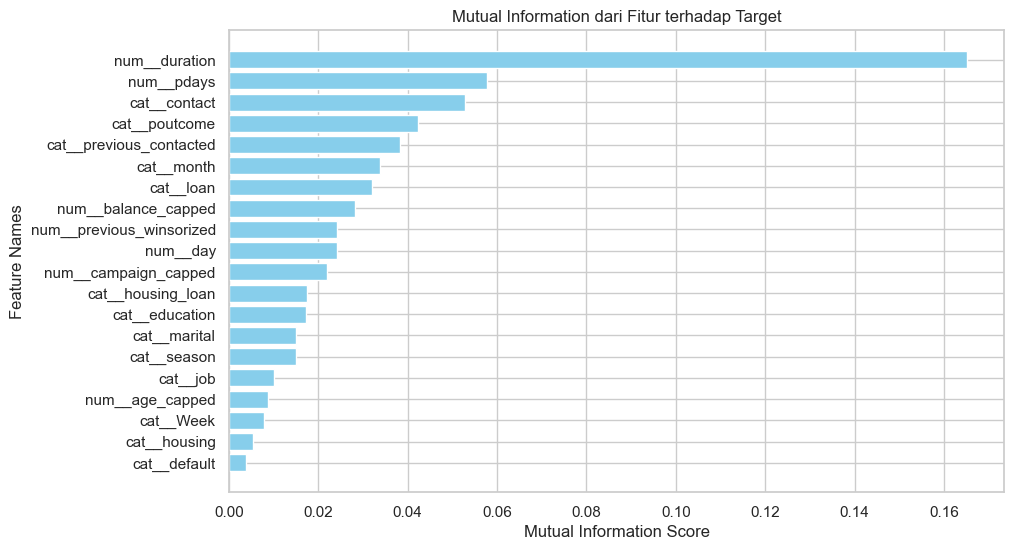

In [57]:
# Hitung nilai Mutual Information (MI) untuk setiap fitur
from sklearn.feature_selection import mutual_info_classif
X_train_transformed = pipeline.fit_transform(X_train_val)  # Transformasi awal
feature_names = pipeline.get_feature_names_out()
mi_scores = mutual_info_classif(X_train_transformed, y_train_val, discrete_features=False)

# Urutkan fitur berdasarkan MI Score
sorted_idx = np.argsort(mi_scores)[::-1]
sorted_features = np.array(feature_names)[sorted_idx]
sorted_mi_scores = mi_scores[sorted_idx]
# Buat DataFrame untuk MI Score
mi_df = pd.DataFrame({"Feature": sorted_features, "MI Score": sorted_mi_scores})

# Tampilkan tabel MI Score
print(mi_df)


# Plot Mutual Information Scores
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_mi_scores, color='skyblue')
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature Names")
plt.title("Mutual Information dari Fitur terhadap Target")
plt.gca().invert_yaxis()
plt.show()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SelectKBest was fit

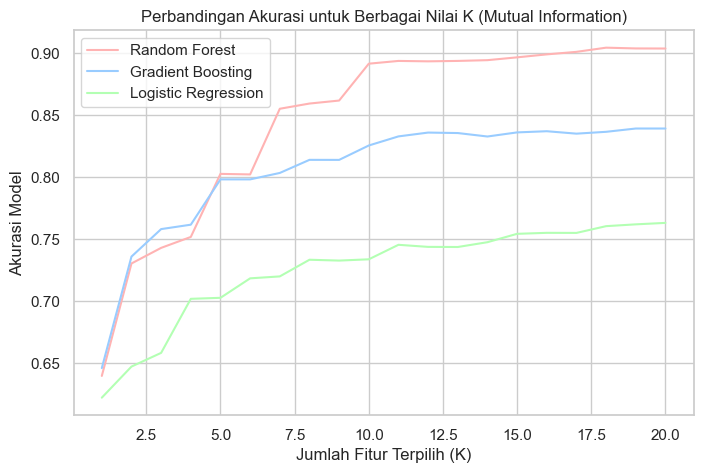

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set random seed
np.random.seed(42)

# Pastikan X_train_transformed memiliki nama fitur yang benar
feature_names = pipeline.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_transformed, columns=feature_names)

# Daftar nilai K yang ingin diuji (1 hingga semua fitur)
K_values = list(range(1, len(feature_names) + 1))

# Dictionary untuk menyimpan hasil akurasi
accuracy_results = {"Random Forest": [], "Gradient Boosting": [], "Logistic Regression": []}

for K in K_values:
    # Pilih K fitur terbaik menggunakan Mutual Information (MI)
    selector = SelectKBest(mutual_info_classif, k=K)
    X_train_selected = selector.fit_transform(X_train_df, y_train_val)
    X_test_selected = selector.transform(pipeline.transform(X_test))  # Transformasi untuk test set

    # Dapatkan fitur yang dipilih
    selected_features = X_train_df.columns[selector.get_support()]

    # Bagi dataset menjadi train dan test dengan fitur terpilih
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_train_df[selected_features], y_train_val, test_size=0.2, random_state=42
    )

    # Model yang akan diuji
    models = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
    }

    for model_name, model in models.items():
        model.fit(X_train_split, y_train_split)
        y_pred = model.predict(X_test_split)
        accuracy = f1_score(y_test_split, y_pred)
        accuracy_results[model_name].append(accuracy)

# Warna pastel untuk plot (sesuai preferensi Anda)
colors = {"Random Forest": "#ffb3b3", "Gradient Boosting": "#99ccff", "Logistic Regression": "#b3ffb3"}

# Plot hasil akurasi
plt.figure(figsize=(8, 5))
for model_name, accuracies in accuracy_results.items():
    plt.plot(K_values, accuracies, linestyle='-', label=model_name, color=colors[model_name])

plt.xlabel("Jumlah Fitur Terpilih (K)")
plt.ylabel("Akurasi Model")
plt.title("Perbandingan Akurasi untuk Berbagai Nilai K (Mutual Information)")
plt.legend()
plt.grid(True)
plt.show()

# Modelling

### Cross Validation Tanpa Balancing Data

In [39]:


# Model yang akan digunakan
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "ExtraTree": ExtraTreesClassifier(random_state=42),
    "LGBM": lgb.LGBMClassifier(random_state=42),
    "XGB": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# StratifiedKFold untuk cross-validation di Training+Validation (90%)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {model_name: {"f1_score": [], "time": []} for model_name in models}

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_val, y_train_val)):
    print(f"Fold {fold+1}")
    X_train_fold, X_val_fold = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]

    # Transformasi menggunakan pipeline
    X_train_fold_transformed = pipeline.fit_transform(X_train_fold)
    X_val_fold_transformed = pipeline.transform(X_val_fold)

    for model_name, model in models.items():
        start_time = time.time()
        
        # Train model
        model.fit(X_train_fold_transformed, y_train_fold)
        
        # Predict
        y_val_pred = model.predict(X_val_fold_transformed)
        
        # Hitung F1-score
        f1 = f1_score(y_val_fold, y_val_pred, average='macro')  # Bisa diganti 'weighted' jika dataset imbalance
        elapsed_time = time.time() - start_time
        
        # Simpan hasil
        cv_results[model_name]["f1_score"].append(f1)
        cv_results[model_name]["time"].append(elapsed_time)
        
        print(f"{model_name} F1 Score Fold {fold+1}: {f1:.4f} (Time: {elapsed_time:.2f}s)")

# Rata-rata hasil cross-validation
df_results = pd.DataFrame({
    model_name: [
        np.mean(cv_results[model_name]["f1_score"]),
        np.std(cv_results[model_name]["f1_score"]),
        np.mean(cv_results[model_name]["time"])
    ]
    for model_name in models
}, index=["Mean F1 Score", "Std F1 Score", "Mean Time"]).T

print("\nCross-Validation Results:")
print(df_results)


Fold 1
RandomForest F1 Score Fold 1: 0.9156 (Time: 10.36s)
ExtraTree F1 Score Fold 1: 0.9131 (Time: 6.31s)
[LightGBM] [Info] Number of positive: 22946, number of negative: 31622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1564
[LightGBM] [Info] Number of data points in the train set: 54568, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.420503 -> initscore=-0.320709
[LightGBM] [Info] Start training from score -0.320709
LGBM F1 Score Fold 1: 0.8954 (Time: 2.96s)
XGB F1 Score Fold 1: 0.9072 (Time: 0.47s)
GradientBoosting F1 Score Fold 1: 0.8542 (Time: 7.30s)
Fold 2
RandomForest F1 Score Fold 2: 0.9143 (Time: 8.90s)
ExtraTree F1 Score Fold 2: 0.9105 (Time: 6.71s)
[LightGBM] [Info] Number of positive: 22947, number of negative: 31622
[LightGBM] [Info] 

### Cross Validation dengan SMOTE

In [40]:
import time
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Model yang akan digunakan
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "ExtraTree": ExtraTreesClassifier(random_state=42),
    "LGBM": lgb.LGBMClassifier(random_state=42),
    "XGB": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# StratifiedKFold untuk cross-validation di Training+Validation (90%)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {model_name: {"f1_score": [], "time": []} for model_name in models}

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_val, y_train_val)):
    print(f"Fold {fold+1}")
    X_train_fold, X_val_fold = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]

    # Transformasi menggunakan pipeline
    X_train_fold_transformed = pipeline.fit_transform(X_train_fold)
    X_val_fold_transformed = pipeline.transform(X_val_fold)

    # **Terapkan SMOTE**
    smote = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold_transformed, y_train_fold)

    for model_name, model in models.items():
        start_time = time.time()
        
        # Train model dengan data yang sudah di-SMOTE
        model.fit(X_train_fold_resampled, y_train_fold_resampled)
        
        # Predict
        y_val_pred = model.predict(X_val_fold_transformed)
        
        # Hitung F1-score
        f1 = f1_score(y_val_fold, y_val_pred, average='macro')  # Bisa diganti 'weighted' jika dataset imbalance
        elapsed_time = time.time() - start_time
        
        # Simpan hasil
        cv_results[model_name]["f1_score"].append(f1)
        cv_results[model_name]["time"].append(elapsed_time)
        
        print(f"{model_name} F1 Score Fold {fold+1}: {f1:.4f} (Time: {elapsed_time:.2f}s)")

# Rata-rata hasil cross-validation
df_results = pd.DataFrame({
    model_name: [
        np.mean(cv_results[model_name]["f1_score"]),
        np.std(cv_results[model_name]["f1_score"]),
        np.mean(cv_results[model_name]["time"])
    ]
    for model_name in models
}, index=["Mean F1 Score", "Std F1 Score", "Mean Time"]).T

print("\nCross-Validation Results:")
print(df_results)


Fold 1
RandomForest F1 Score Fold 1: 0.9150 (Time: 11.38s)
ExtraTree F1 Score Fold 1: 0.9117 (Time: 7.84s)
[LightGBM] [Info] Number of positive: 31622, number of negative: 31622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4199
[LightGBM] [Info] Number of data points in the train set: 63244, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LGBM F1 Score Fold 1: 0.8937 (Time: 0.81s)
XGB F1 Score Fold 1: 0.9052 (Time: 0.67s)
GradientBoosting F1 Score Fold 1: 0.8581 (Time: 13.10s)
Fold 2
RandomForest F1 Score Fold 2: 0.9126 (Time: 9.89s)
ExtraTree F1 Score Fold 2: 0.9117 (Time: 7.31s)
[LightGBM] [Info] Number of positive: 31622, number of negative: 31622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead o

### Cross Validation Stacking Tanpa Balancing Data

In [41]:
from sklearn.linear_model import LogisticRegression
base_models = [
    ("RandomForest", RandomForestClassifier(random_state=42)),
    ("ExtraTree", ExtraTreesClassifier(random_state=42)),
    ("LGBM", lgb.LGBMClassifier(random_state=42)),
    ("XGB", XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))
]

# Meta model (Final classifier)
meta_model = LogisticRegression()

# Stacking Model
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []
train_times = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_val, y_train_val)):
    print(f"Fold {fold+1}")
    
    X_train_fold, X_val_fold = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]

    # Transformasi menggunakan pipeline
    X_train_fold_transformed = pipeline.fit_transform(X_train_fold)
    X_val_fold_transformed = pipeline.transform(X_val_fold)

    # **Train Stacking Model tanpa SMOTE**
    start_time = time.time()
    stacking_clf.fit(X_train_fold_transformed, y_train_fold)
    y_val_pred = stacking_clf.predict(X_val_fold_transformed)
    
    # Hitung F1-score
    f1 = f1_score(y_val_fold, y_val_pred, average='macro')
    elapsed_time = time.time() - start_time
    
    f1_scores.append(f1)
    train_times.append(elapsed_time)

    print(f"Stacking Model F1 Score Fold {fold+1}: {f1:.6f} (Time: {elapsed_time:.2f}s)")

# Rata-rata hasil cross-validation
print("\nStacking Model Performance:")
print(f"Mean F1 Score: {np.mean(f1_scores):.6f}")
print(f"Std F1 Score: {np.std(f1_scores):.6f}")
print(f"Mean Training Time: {np.mean(train_times):.2f}s")

Fold 1
[LightGBM] [Info] Number of positive: 22946, number of negative: 31622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1564
[LightGBM] [Info] Number of data points in the train set: 54568, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.420503 -> initscore=-0.320709
[LightGBM] [Info] Start training from score -0.320709
[LightGBM] [Info] Number of positive: 18357, number of negative: 25297
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1587
[LightGBM] [Info] Number of data points in the train set: 43654, number of used features: 20
[LightGBM] 

### Cross Validation Stacking dengan SMOTE

In [42]:
import time
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE  # Untuk menangani class imbalance

# Base models
base_models = [
    ("RandomForest", RandomForestClassifier(random_state=42)),
    ("ExtraTree", ExtraTreesClassifier(random_state=42)),
    ("LGBM", lgb.LGBMClassifier(random_state=42)),
    ("XGB", XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))
]

# Meta model (Final classifier)
meta_model = LogisticRegression()

# Stacking Model
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []
train_times = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_val, y_train_val)):
    print(f"Fold {fold+1}")
    
    X_train_fold, X_val_fold = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]

    # Transformasi menggunakan pipeline
    X_train_fold_transformed = pipeline.fit_transform(X_train_fold)
    X_val_fold_transformed = pipeline.transform(X_val_fold)

    # **Terapkan SMOTE**
    smote = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold_transformed, y_train_fold)

    # Train Stacking Model
    start_time = time.time()
    stacking_clf.fit(X_train_fold_resampled, y_train_fold_resampled)
    y_val_pred = stacking_clf.predict(X_val_fold_transformed)
    
    # Hitung F1-score
    f1 = f1_score(y_val_fold, y_val_pred, average='macro')
    elapsed_time = time.time() - start_time
    
    f1_scores.append(f1)
    train_times.append(elapsed_time)

    print(f"Stacking Model F1 Score Fold {fold+1}: {f1:.6f} (Time: {elapsed_time:.2f}s)")

# Rata-rata hasil cross-validation
print("\nStacking Model Performance:")
print(f"Mean F1 Score: {np.mean(f1_scores):.6f}")
print(f"Std F1 Score: {np.std(f1_scores):.6f}")
print(f"Mean Training Time: {np.mean(train_times):.2f}s")


Fold 1
[LightGBM] [Info] Number of positive: 31622, number of negative: 31622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4199
[LightGBM] [Info] Number of data points in the train set: 63244, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 25298, number of negative: 25297
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4203
[LightGBM] [Info] Number of data points in the train set: 50595, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500010 -> initsc

### Fit Ulang ke Keseluruhan Data (Random Forest Tanpa Balancing Data)

In [43]:
# Mulai pencatatan waktu
start_time = time.time()

X_train_transformed = pipeline.fit_transform(X_train_val)
X_test_transformed = pipeline.transform(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_transformed, y_train_val)

# Prediksi data test
y_test_pred = rf.predict(X_test_transformed)

# Hitung F1-score pada data test
f1_test = f1_score(y_test, y_test_pred, average='macro')
end_time = time.time()

# Cetak hasil
print(f"F1-score pada data test: {f1_test:.4f}")
print(f"Running time: {end_time - start_time:.4f} seconds")

F1-score pada data test: 0.9185
Running time: 41.7854 seconds


### Fit Ulang ke Keseluruhan Data (Stacking Model Tanpa Balancing Data)

In [44]:
# **Transformasi seluruh data train (train + validation) menggunakan pipeline**
X_train_val_transformed = pipeline.fit_transform(X_train_val)
X_test_transformed = pipeline.transform(X_test)

# **Train Stacking Model pada Seluruh Data Training tanpa SMOTE**
start_time = time.time()
stacking_clf.fit(X_train_val_transformed, y_train_val)
elapsed_time = time.time() - start_time

print(f"\nStacking Model Training Completed in {elapsed_time:.2f}s")

# **Predict Data Test**
y_test_pred = stacking_clf.predict(X_test_transformed)

# **Evaluasi Hasil**
test_f1 = f1_score(y_test, y_test_pred, average="macro")
print(f"\nFinal Test F1 Score: {test_f1:.6f}")


[LightGBM] [Info] Number of positive: 28683, number of negative: 39528
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 68211, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.420504 -> initscore=-0.320705
[LightGBM] [Info] Start training from score -0.320705
[LightGBM] [Info] Number of positive: 22946, number of negative: 31622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1587
[LightGBM] [Info] Number of data points in the train set: 54568, number of used features: 20
[LightGBM] [Info] 

### Hyperparameter Tuning Random Forest

In [45]:
from sklearn.model_selection import GridSearchCV

# Mulai pencatatan waktu
start_time = time.time()

# Definisikan parameter yang ingin diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train_transformed, y_train_val)

# Model terbaik
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Prediksi menggunakan model terbaik
y_test_pred = best_rf.predict(X_test_transformed)

# Hitung F1-score pada data test
f1_test = f1_score(y_test, y_test_pred, average='macro')

# Catat waktu selesai
end_time = time.time()

# Cetak hasil
print(f"F1-score pada data test: {f1_test:.4f}")
print(f"Running time: {end_time - start_time:.4f} seconds")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
F1-score pada data test: 0.9185
Running time: 639.9583 seconds


In [46]:
from sklearn.metrics import classification_report

# Tampilkan Classification Report
print(classification_report(y_test, y_test_pred,digits=5))


              precision    recall  f1-score   support

           0    0.94007   0.92124   0.93056      4393
           1    0.89435   0.91905   0.90653      3187

    accuracy                        0.92032      7580
   macro avg    0.91721   0.92014   0.91854      7580
weighted avg    0.92085   0.92032   0.92046      7580



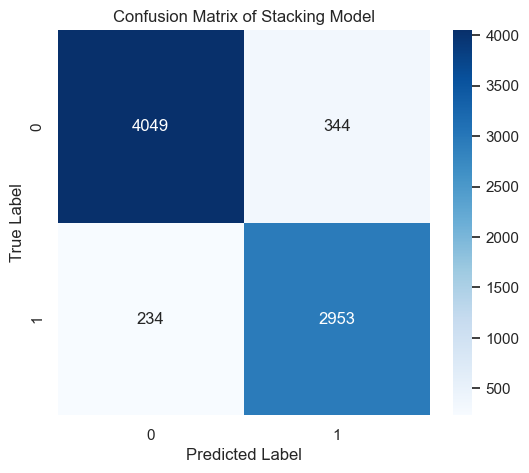

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Stacking Model")
plt.show()


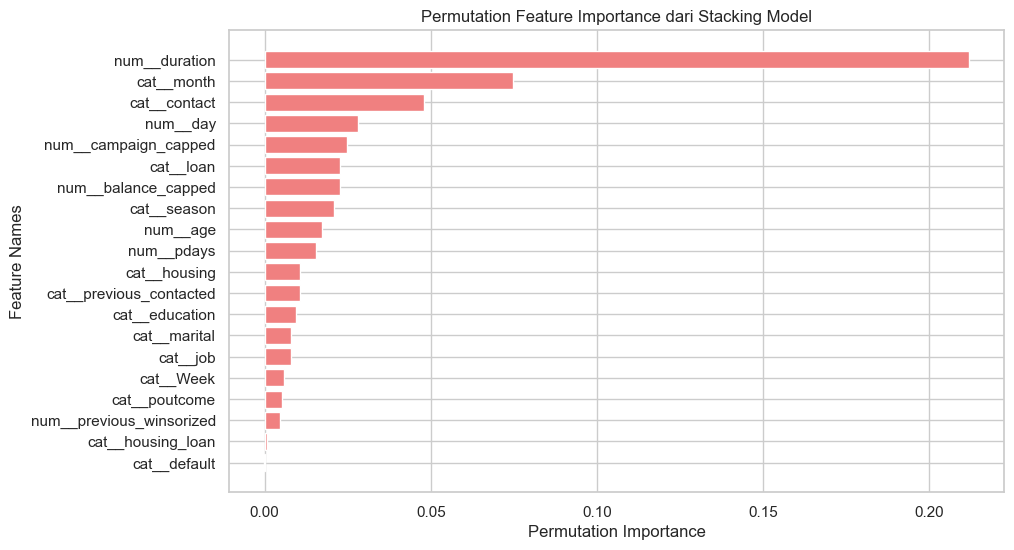

In [47]:
from sklearn.inspection import permutation_importance

# Evaluasi feature importance dengan Permutation Importance
perm_importance = permutation_importance(best_rf, X_test_transformed, y_test, scoring="f1_macro", n_repeats=10, random_state=42)
feature_names = pipeline.get_feature_names_out()

# Urutkan hasilnya
sorted_idx = np.argsort(perm_importance.importances_mean)[::-1]
sorted_features = np.array(feature_names)[sorted_idx]
sorted_importance = perm_importance.importances_mean[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='lightcoral')
plt.xlabel("Permutation Importance")
plt.ylabel("Feature Names")
plt.title("Permutation Feature Importance dari Stacking Model")
plt.gca().invert_yaxis()
plt.show()


### Hyperparameter Tuning Stacking

In [47]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 1. Hyperparameter Tuning untuk RandomForest
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='f1_macro', n_jobs=-1)
rf_grid.fit(X_train_val_transformed, y_train_val)
best_rf = rf_grid.best_estimator_

# 2. Hyperparameter Tuning untuk ExtraTrees
et_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
et_grid = GridSearchCV(ExtraTreesClassifier(random_state=42), et_params, cv=3, scoring='f1_macro', n_jobs=-1)
et_grid.fit(X_train_val_transformed, y_train_val)
best_et = et_grid.best_estimator_

# 3. Hyperparameter Tuning untuk LightGBM
lgb_params = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 300, 500]
}
lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_params, cv=3, scoring='f1_macro', n_jobs=-1)
lgb_grid.fit(X_train_val_transformed, y_train_val)
best_lgb = lgb_grid.best_estimator_

# 4. Hyperparameter Tuning untuk XGBoost
xgb_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}
xgb_grid = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), 
                        xgb_params, cv=3, scoring='f1_macro', n_jobs=-1)
xgb_grid.fit(X_train_val_transformed, y_train_val)
best_xgb = xgb_grid.best_estimator_

# 5. Hyperparameter Tuning untuk Meta Model (Logistic Regression)
meta_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}
meta_grid = GridSearchCV(LogisticRegression(solver='liblinear'), meta_params, cv=3, scoring='f1_macro', n_jobs=-1)
meta_grid.fit(X_train_val_transformed, y_train_val)
best_meta = meta_grid.best_estimator_


[LightGBM] [Info] Number of positive: 28683, number of negative: 39528
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 68211, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.420504 -> initscore=-0.320705
[LightGBM] [Info] Start training from score -0.320705


In [48]:
from sklearn.ensemble import StackingClassifier

# Base models setelah tuning
tuned_base_models = [
    ("RandomForest", best_rf),
    ("ExtraTree", best_et),
    ("LGBM", best_lgb),
    ("XGB", best_xgb)
]

# Stacking Classifier dengan base models yang sudah dituning
stacking_clf_tuned = StackingClassifier(
    estimators=tuned_base_models, 
    final_estimator=best_meta, 
    cv=5
)

# **Train Model**
start_time = time.time()
stacking_clf_tuned.fit(X_train_val_transformed, y_train_val)
elapsed_time = time.time() - start_time

print(f"\nStacking Model Training Completed in {elapsed_time:.2f}s")

# **Predict Data Test**
y_test_pred_tuned = stacking_clf_tuned.predict(X_test_transformed)

# **Evaluasi Hasil**
test_f1_tuned = f1_score(y_test, y_test_pred_tuned, average="macro")
print(f"\nFinal Test F1 Score (Tuned): {test_f1_tuned:.4f}")


[LightGBM] [Info] Number of positive: 28683, number of negative: 39528
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 68211, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.420504 -> initscore=-0.320705
[LightGBM] [Info] Start training from score -0.320705
[LightGBM] [Info] Number of positive: 22946, number of negative: 31622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1587
[LightGBM] [Info] Number of data points in the train set: 54568, number of used features: 20
[LightGBM] [Info] 

In [49]:
from sklearn.metrics import classification_report

# Tampilkan Classification Report
print(classification_report(y_test, y_test_pred_tuned,digits=5))


              precision    recall  f1-score   support

           0    0.94277   0.93740   0.94008      4393
           1    0.91438   0.92156   0.91796      3187

    accuracy                        0.93074      7580
   macro avg    0.92857   0.92948   0.92902      7580
weighted avg    0.93083   0.93074   0.93078      7580



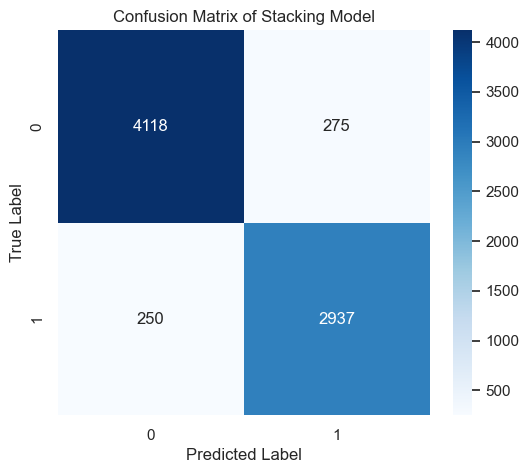

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_tuned)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Stacking Model")
plt.show()


In [62]:
len(y_test_pred_tuned)

7580

In [61]:
X_test

,job,marital,education,default,housing,loan,contact,day,month,pdays,poutcome,balance_capped,campaign_capped,age_capped,previous_winsorized,housing_loan,Week,previous_contacted,season,duration
47523,2,1,1,0,1,0,1,4.0,9,84.0,2,4043.0,1.0,39.0,0.0,0,0,1,3,730.0
69578,1,2,2,0,1,0,<NA>,21.0,4,-1.0,1,2976.0,1.0,32.0,0.0,0,2,0,1,174.0
2921,0,1,1,0,1,0,0,12.0,4,-1.0,1,34.0,4.0,28.0,0.0,0,1,0,1,136.0
70153,1,2,2,<NA>,<NA>,0,1,20.0,3,-1.0,1,267.0,1.0,61.0,0.0,0,2,0,1,190.0
6907,8,0,1,0,0,0,1,5.0,1,-1.0,1,4043.0,6.0,53.0,0.0,0,0,0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,5,2,0,0,0,0,1,5.0,7,-1.0,1,286.0,3.0,57.0,0.0,0,0,0,2,100.0
22890,10,2,0,0,0,0,2,28.0,0,-1.0,1,4043.0,2.0,55.0,0.0,0,3,0,0,201.0
29732,10,2,1,0,0,0,1,25.0,7,-1.0,1,1052.0,4.0,51.0,0.0,0,3,0,2,280.0
74624,1,2,2,<NA>,1,0,0,3.0,5,-1.0,1,1355.0,1.0,NaN,0.0,0,0,0,2,272.0


In [63]:
df_pred =X_test.copy()
df_pred["Hasil Prediksi"] = y_test_pred_tuned
df_pred

,job,marital,education,default,housing,loan,contact,day,month,pdays,...,balance_capped,campaign_capped,age_capped,previous_winsorized,housing_loan,Week,previous_contacted,season,duration,Hasil Prediksi
47523,2,1,1,0,1,0,1,4.0,9,84.0,...,4043.0,1.0,39.0,0.0,0,0,1,3,730.0,1
69578,1,2,2,0,1,0,<NA>,21.0,4,-1.0,...,2976.0,1.0,32.0,0.0,0,2,0,1,174.0,0
2921,0,1,1,0,1,0,0,12.0,4,-1.0,...,34.0,4.0,28.0,0.0,0,1,0,1,136.0,0
70153,1,2,2,<NA>,<NA>,0,1,20.0,3,-1.0,...,267.0,1.0,61.0,0.0,0,2,0,1,190.0,1
6907,8,0,1,0,0,0,1,5.0,1,-1.0,...,4043.0,6.0,53.0,0.0,0,0,0,0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,5,2,0,0,0,0,1,5.0,7,-1.0,...,286.0,3.0,57.0,0.0,0,0,0,2,100.0,0
22890,10,2,0,0,0,0,2,28.0,0,-1.0,...,4043.0,2.0,55.0,0.0,0,3,0,0,201.0,0
29732,10,2,1,0,0,0,1,25.0,7,-1.0,...,1052.0,4.0,51.0,0.0,0,3,0,2,280.0,0
74624,1,2,2,<NA>,1,0,0,3.0,5,-1.0,...,1355.0,1.0,NaN,0.0,0,0,0,2,272.0,0


In [64]:
df_pred.to_csv(("C:/Users/Lenovo/Downloads/hasil prediksi.csv"))

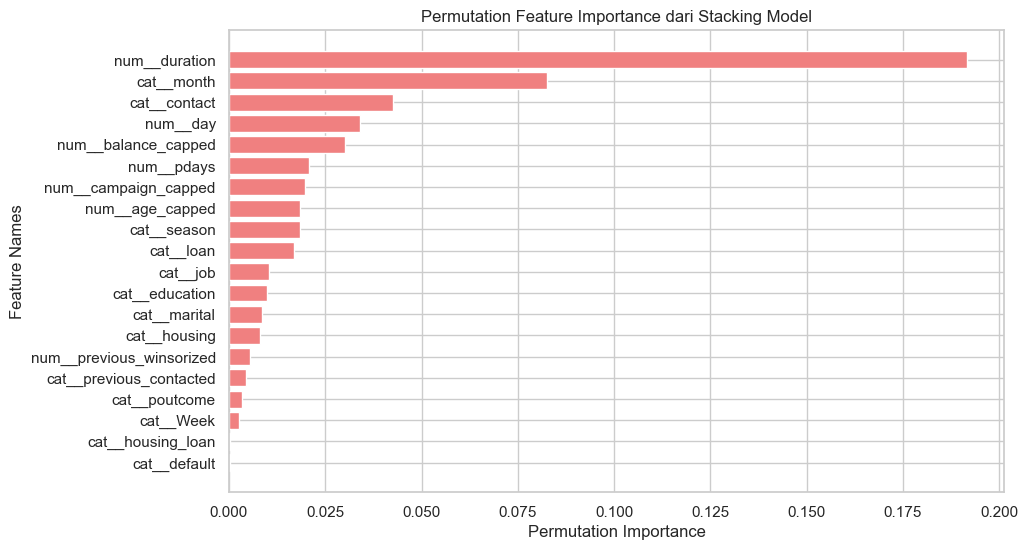

In [51]:
from sklearn.inspection import permutation_importance

# Evaluasi feature importance dengan Permutation Importance
perm_importance = permutation_importance(stacking_clf_tuned, X_test_transformed, y_test, scoring="f1_macro", n_repeats=10, random_state=42)
feature_names = pipeline.get_feature_names_out()

# Urutkan hasilnya
sorted_idx = np.argsort(perm_importance.importances_mean)[::-1]
sorted_features = np.array(feature_names)[sorted_idx]
sorted_importance = perm_importance.importances_mean[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='lightcoral')
plt.xlabel("Permutation Importance")
plt.ylabel("Feature Names")
plt.title("Permutation Feature Importance dari Stacking Model")
plt.gca().invert_yaxis()
plt.show()


In [52]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import time
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

# Model XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Stratified K-Fold dengan 5 fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []

for train_idx, val_idx in cv.split(X_train_val, y_train_val):
    X_train_fold, X_val_fold = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]
    
    # Transformasi menggunakan pipeline
    X_train_fold_transformed = pipeline.fit_transform(X_train_fold)
    X_val_fold_transformed = pipeline.transform(X_val_fold)
    
    # Train model
    xgb.fit(X_train_fold_transformed, y_train_fold)
    
    # Predict
    y_pred = xgb.predict(X_val_fold_transformed)
    
    # Hitung F1-score
    f1 = f1_score(y_val_fold, y_pred, average='macro')  # Bisa diganti 'weighted' jika dataset imbalance
    f1_scores.append(f1)

# Hasil
print(f"Rata-rata F1-score: {np.mean(f1_scores):.4f}")
print(f"Standar deviasi F1-score: {np.std(f1_scores):.4f}")


Rata-rata F1-score: 0.9056
Standar deviasi F1-score: 0.0014


In [53]:
# Latih model dengan seluruh data training
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
X_train_transformed = pipeline.fit_transform(X_train_val)
X_test_transformed = pipeline.transform(X_test)

xgb =  lgb.LGBMClassifier(random_state=42)
xgb.fit(X_train_transformed, y_train_val)

# Prediksi data test
y_test_pred = xgb.predict(X_test_transformed)

# Hitung F1-score pada data test
f1_test = f1_score(y_test, y_test_pred, average='macro')
print(f"F1-score pada data test: {f1_test:.4f}")


[LightGBM] [Info] Number of positive: 28683, number of negative: 39528
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 68211, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.420504 -> initscore=-0.320705
[LightGBM] [Info] Start training from score -0.320705
F1-score pada data test: 0.8939


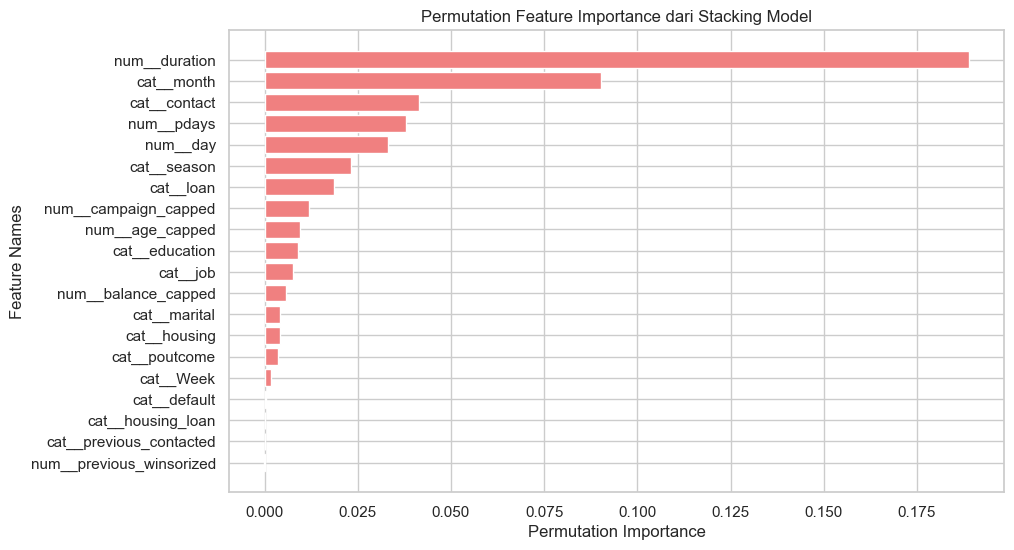

In [54]:
from sklearn.inspection import permutation_importance

# Evaluasi feature importance dengan Permutation Importance
perm_importance = permutation_importance(xgb, X_test_transformed, y_test, scoring="f1_macro", n_repeats=10, random_state=42)


# Urutkan hasilnya
sorted_idx = np.argsort(perm_importance.importances_mean)[::-1]
sorted_features = np.array(feature_names)[sorted_idx]
sorted_importance = perm_importance.importances_mean[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='lightcoral')
plt.xlabel("Permutation Importance")
plt.ylabel("Feature Names")
plt.title("Permutation Feature Importance dari Stacking Model")
plt.gca().invert_yaxis()
plt.show()


 97%|=================== | 7387/7580 [00:27<00:00]       

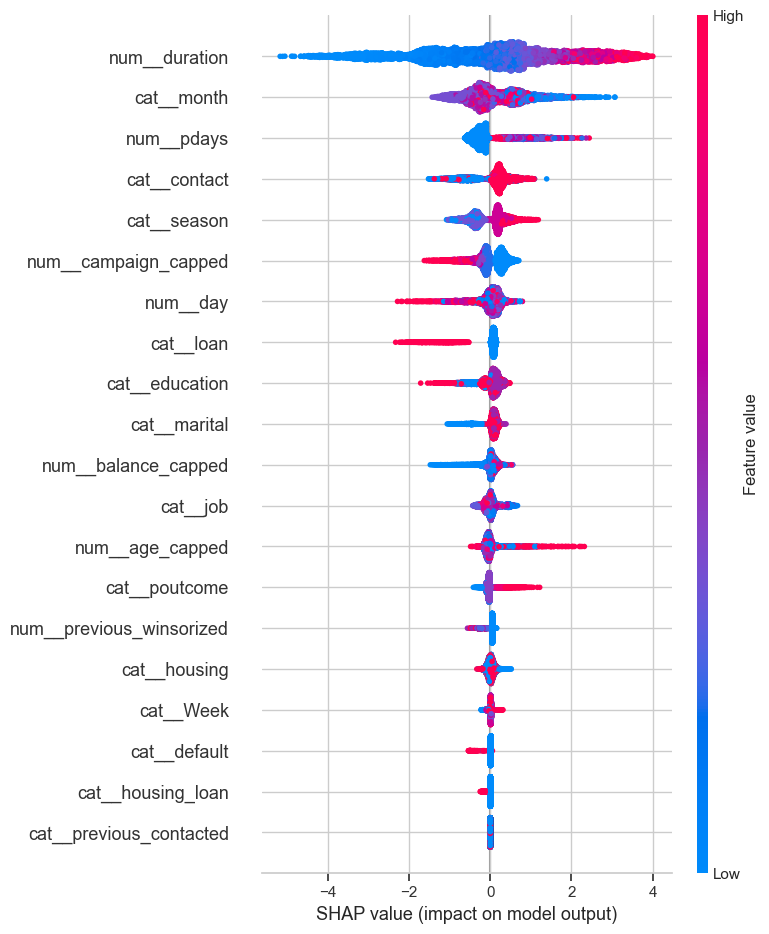

In [55]:
import shap

# Buat objek explainer
explainer = shap.Explainer(xgb, X_train_transformed)

# Hitung SHAP values untuk data test
shap_values = explainer(X_test_transformed)

# Plot summary plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)


In [56]:
feature_names

array(['num__age_capped', 'num__day', 'num__duration', 'num__pdays',
       'num__balance_capped', 'num__campaign_capped',
       'num__previous_winsorized', 'cat__job', 'cat__marital',
       'cat__education', 'cat__default', 'cat__housing', 'cat__loan',
       'cat__contact', 'cat__month', 'cat__poutcome', 'cat__housing_loan',
       'cat__Week', 'cat__previous_contacted', 'cat__season'],
      dtype=object)